In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('D:\Simplilearn Goal\Machine Learning course\Demo Datasets\Lesson 6')

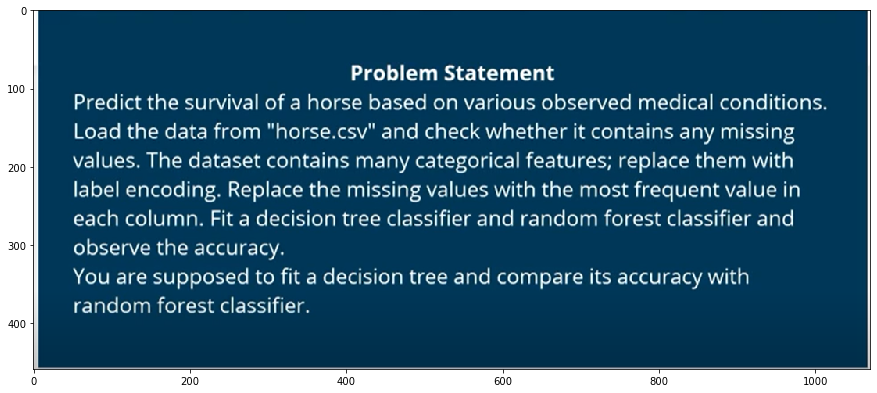

In [79]:
#problem statement
img=plt.imread('capture.png')
plt.figure(figsize=(15,10))
plt.imshow(img)

In [2]:
horse=pd.read_csv('horse.csv')

In [3]:
horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [27]:
categories=['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 
        'abdomo_appearance', 'surgical_lesion','cp_data']

for category in categories:
    horse[category]=pd.get_dummies(horse[category])

In [13]:
y=horse.outcome.values
x=horse.drop('outcome',axis=1).values

In [28]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
y=lr.fit_transform(y)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [50]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((209, 27), (90, 27), (209,), (90,))

In [62]:
from sklearn.impute import SimpleImputer
si=SimpleImputer()
x_train=si.fit_transform(x_train)
x_test=si.fit_transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dr=DecisionTreeClassifier()

In [63]:
dr.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
y_pred=dr.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [67]:
print('accuracy score is',accuracy_score(y_pred,y_test))

accuracy score is 0.6777777777777778


In [68]:
print('confusion matrix',confusion_matrix(y_pred,y_test))

confusion matrix [[19  1  7]
 [ 4  7  8]
 [ 5  4 35]]


In [69]:
print('classification matrix',classification_report(y_pred,y_test))

classification matrix               precision    recall  f1-score   support

           0       0.68      0.70      0.69        27
           1       0.58      0.37      0.45        19
           2       0.70      0.80      0.74        44

    accuracy                           0.68        90
   macro avg       0.65      0.62      0.63        90
weighted avg       0.67      0.68      0.67        90



In [71]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier()

In [73]:
rd.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
y_pred_1=rd.predict(x_test)

In [77]:
print('accuracy score is',accuracy_score(y_pred_1,y_test))

accuracy score is 0.7777777777777778
